In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('Hitters.csv')
df.head()

,Players,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,#NAME?,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,#NAME?,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,#NAME?,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,#NAME?,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,#NAME?,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [7]:
df.dropna(inplace=True)
df.drop('Players',axis=1, inplace=True)

In [8]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [12]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']] )
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [13]:
X_ = df.drop(['League', 'Division', 'NewLeague', 'Salary'], axis=1).astype('float64')

In [14]:
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [15]:
y = df.Salary

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 45.7 KB


In [20]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

In [23]:
ridge = Ridge(normalize=True)
coefs = []

In [24]:
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [35]:
coefs[0]

array([  2.41792033e-10,   8.77087820e-10,   3.53418911e-09,
         1.48322166e-09,   1.56674826e-09,   1.84396625e-09,
         7.54102361e-09,   2.07601888e-11,   7.64034224e-11,
         5.76187223e-10,   1.53282320e-10,   1.58190714e-10,
         1.67364484e-10,   9.68457013e-11,   1.58184041e-11,
        -7.37555427e-11,  -2.57640933e-09,  -3.46788982e-08,
        -5.11835167e-10])

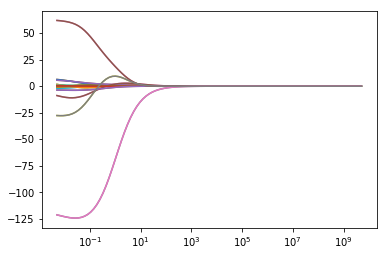

In [33]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.8)

In [38]:
ridgecv = RidgeCV(alphas=alphas, normalize=True, scoring='neg_mean_squared_error')
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([  5.00000e+09,   3.78232e+09, ...,   6.60971e-03,   5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [39]:
ridgecv.coef_

array([  1.41299816e-01,   8.60682109e-01,   3.73649023e-01,
         1.62480191e+00,   6.29522819e-01,   2.38837394e+00,
         1.86719817e+00,   8.54190621e-03,   3.59982671e-02,
         4.53436458e-01,   7.76064091e-02,   1.08104497e-01,
         6.62811674e-02,   1.03492154e-01,  -3.14224294e-02,
         2.04306681e+00,   2.52718703e+01,  -2.45582155e+01,
         1.84568961e+01])

In [45]:
pd.Series(data=ridgecv.coef_, index=X_train.columns)

AtBat           0.141300
Hits            0.860682
HmRun           0.373649
Runs            1.624802
RBI             0.629523
Walks           2.388374
Years           1.867198
CAtBat          0.008542
CHits           0.035998
CHmRun          0.453436
CRuns           0.077606
CRBI            0.108104
CWalks          0.066281
PutOuts         0.103492
Assists        -0.031422
Errors          2.043067
League_N       25.271870
Division_W    -24.558215
NewLeague_N    18.456896
dtype: float64

In [43]:
bestaplha = ridgecv.alpha_

In [49]:
redgemodel = Ridge(alpha = bestaplha, normalize=True)
redgemodel.fit(X_train, y_train)
mean_squared_error(y_test, redgemodel.predict(X_test))

110112.06665184906

In [50]:
redgemodel = Ridge(alpha = 0, normalize=True)
redgemodel.fit(X_train, y_train)
mean_squared_error(y_test, redgemodel.predict(X_test))

155273.5018836121

In [52]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

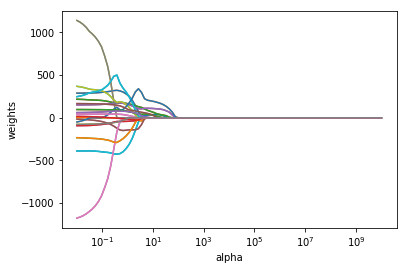

In [55]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [56]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

113469.57801343151

In [57]:
pd.Series(lasso.coef_, index=X.columns)

AtBat          0.000000
Hits           0.908283
HmRun          0.000000
Runs           1.618654
RBI            0.000000
Walks          4.692862
Years          0.000000
CAtBat         0.000000
CHits          0.000000
CHmRun         0.000000
CRuns          0.000000
CRBI           0.489777
CWalks         0.000000
PutOuts        0.020660
Assists        0.000000
Errors         0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64